In [ ]:
#### From James' Code https://github.com/aivaslab/viswork-explore/blob/main/json_explorer.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json

In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Tensorboard/task1_April12.json"

with open(file_path, "r") as f:
  data = json.load(f)

In [4]:
data.keys()

dict_keys(['sessionId', 'identity', 'taskId', 'createdTimestamp', 'submissionId', 'body'])

In [5]:
data_body = json.loads(data['body'])
data_body.keys()

dict_keys(['runGuid', 'events'])

Events has 3 keys: timestamp, type, and body. Calculate frequency of different types of events in the file

In [6]:
event_types = dict()

for event in data_body['events']:
    if event['type'] in event_types:
        ## increse counter if the event already appeared before
        event_types[event['type']] += 1
    else:
        event_types[event['type']] = 1


## view eventtypes and frquency
event_types

{'BlockDropEvent': 3,
 'BlockInitializeEvent': 2,
 'BlockPickupEvent': 3,
 'BlockRotateEvent': 1,
 'CompleteGuide': 1,
 'CompleteGuideStep1': 1,
 'CompleteGuideStep2': 1,
 'CompleteGuideStep3': 1,
 'CompleteGuideStep4': 1,
 'CompleteGuideStep5': 1,
 'CompletePatternEvent': 1,
 'Confirmed': 1,
 'OpenedConfirmDialog': 1,
 'ShowRegion': 12,
 'StartPattern': 1,
 'TaskStartEvent': 1}

In [7]:
print("Unique event count ", len(event_types))

Unique event count  16


In [8]:
print(len(data_body['events']))

32


In [24]:
task_id = data['taskId']
created_timestamp = data['createdTimestamp']
submission_id = data['submissionId']
_body = json.loads(data['body'])
run_guid = _body['runGuid']

In [30]:
created_timestamp 

'2022-04-13T02:32:26.8Z'

Event type = TaskStartEvent , Event = {"localTime":"2022-04-12T22:32:04.0480000-04:00"} , timestamp = 0.0
Event type = StartPattern , Event = 0 , timestamp = 0.02
Event type = BlockInitializeEvent , Event = {"blockId":0,"rotation":{"x":0.0,"y":90.0,"z":0.0},"position":{"x":-4.703702449798584,"y":-5.468055248260498}} , timestamp = 0.02
Event type = BlockInitializeEvent , Event = {"blockId":1,"rotation":{"x":0.0,"y":0.0,"z":90.0},"position":{"x":4.703705787658691,"y":-5.468055248260498}} , timestamp = 0.02
Event type = CompleteGuideStep1 , Event =  , timestamp = 1.78
Event type = CompleteGuideStep2 , Event =  , timestamp = 2.43
Event type = CompleteGuideStep3 , Event =  , timestamp = 2.99
Event type = CompleteGuideStep4 , Event =  , timestamp = 3.59
Event type = CompleteGuideStep5 , Event =  , timestamp = 4.27
Event type = CompleteGuide , Event =  , timestamp = 4.27
Event type = ShowRegion , Event = BankRegion , timestamp = 4.29
Event type = ShowRegion , Event = ConstructionRegion , time
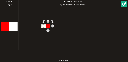

In [42]:
import datetime

### store lates timestamp
latest_timestamp = 0


for event in data_body['events']:
    #if event['type'] in ['ShowRegion']:
        #structure = json.loads(event['body'])
    print("Event type =",event['type'], ", Event =", event['body'], ", timestamp =", round(event['timestamp'], 2))
    latest_timestamp = round(event['timestamp'], 2)
   


In [34]:
latest_timestamp

22.25

In [43]:
## convert created_timestamp string to date_time object
created_datetime_object = datetime.datetime.strptime(created_timestamp, '%Y-%m-%dT%H:%M:%S.%fZ')

In [39]:
latest_datetime = created_datetime_object + datetime.timedelta(seconds=latest_timestamp)

In [40]:
latest_datetime

datetime.datetime(2022, 4, 13, 2, 32, 49, 50000)